#### **Análisis académico segundo semestre estudiantes graduados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer característica**

In [3]:
secondSemester_features = df.loc[df['Target']=='Graduate',['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                                                         'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                                                         'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]

In [4]:
secondSemester_features.describe()

,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579
std,2.211709,2.297197,3.245912,2.268622,2.685608,0.522872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000
50%,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000
75%,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000
max,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


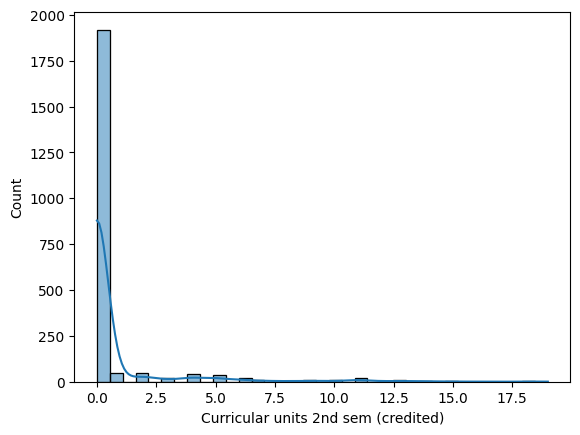

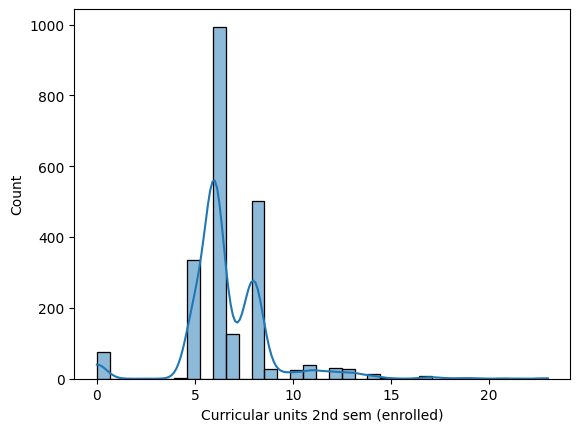

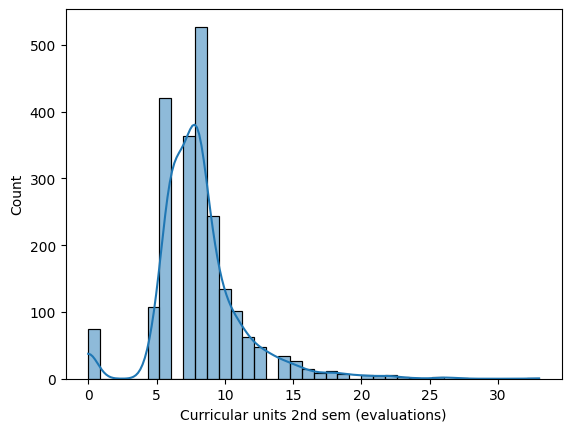

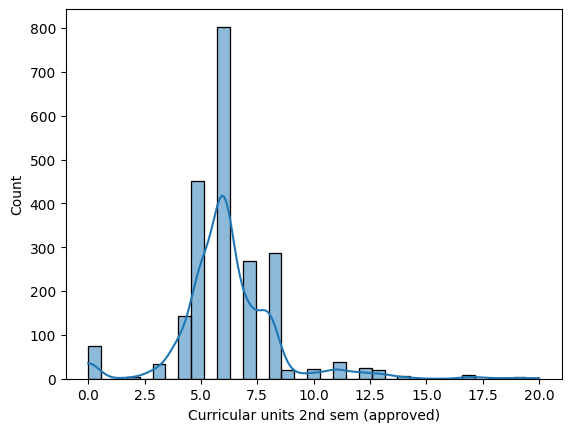

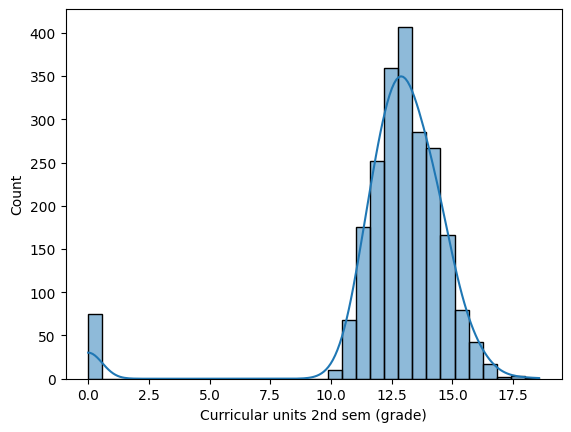

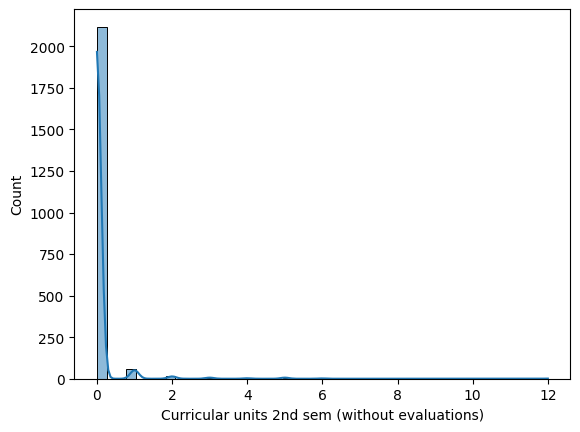

In [5]:
for i in secondSemester_features.columns:
    sns.histplot(data=secondSemester_features, x=i, kde=True, bins=len(i))
    plt.show()

Observaciones:
- La mayoría no tiene creditos.
- Cursaron entre 6-8 asignaturas.
- La asignaturas evaluadas rondan entre 6-9.
- Las asignaturas aprobadas rondan entre 5-7 asignaturas.
- Las calificaciones son en su mayoría aprobadas.

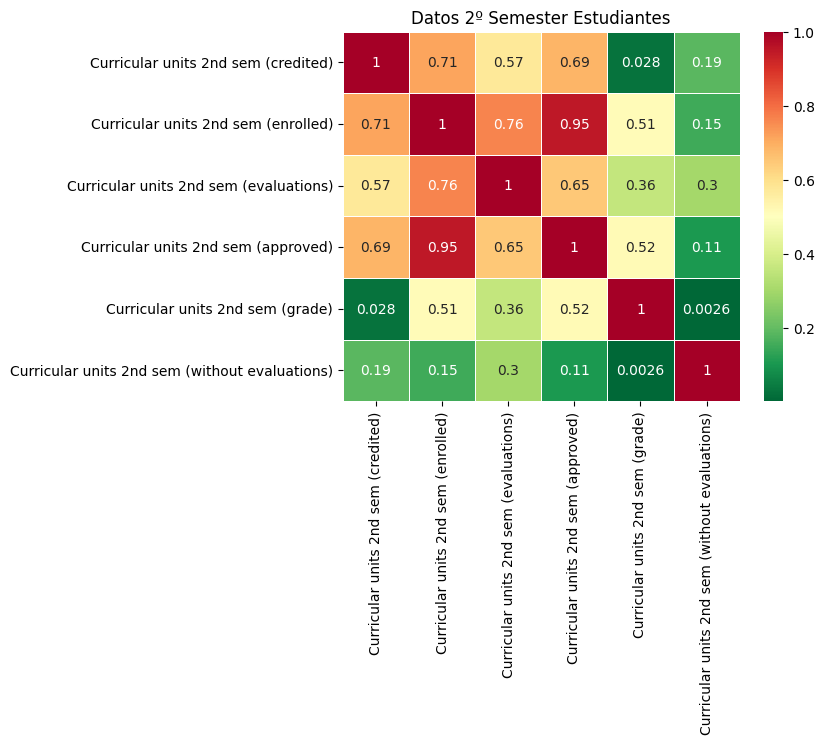

In [6]:
# Mapa de correlaciones entre caractersticas
secondSemester_corr = secondSemester_features.corr()
#mask = np.triu(np.ones_like(firstSemester_corr, dtype=bool))
sns.heatmap(data=secondSemester_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos 2º Semester Estudiantes')
plt.show()

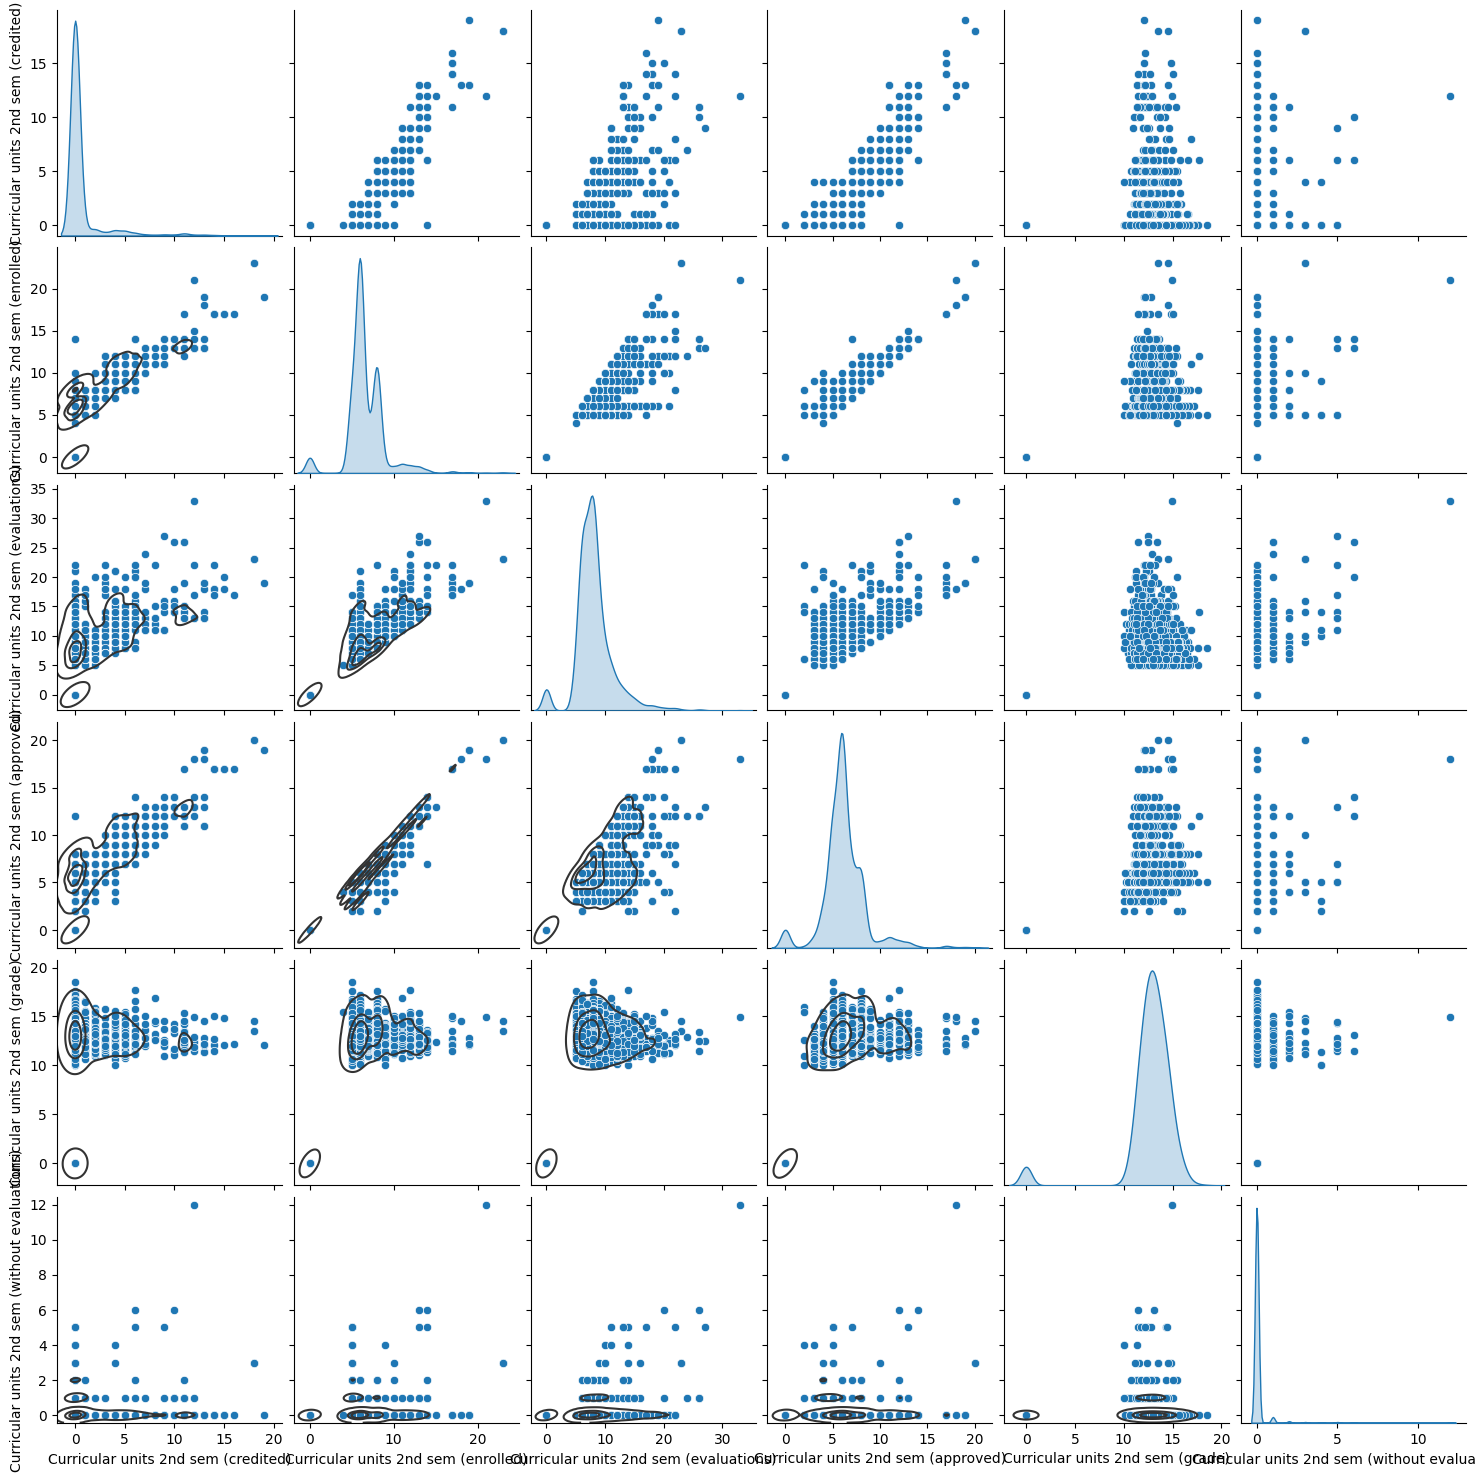

In [7]:
g=sns.pairplot(secondSemester_features, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

Observaciones:
- Los estudiantes con una mayor cantidad de asignaturas inscritos, tienden a aprobar una mayor cantidad de estas.
- Tenemos similares nuemeros de asignaturas evaluadas que inscritas.
- El numero de creditos en relacional al numero de unidades inscritas.
- No difiere el numero de probadas con la calificación.